# Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Dataset Description

In [2]:
breast_cancer = pd.read_csv("breast-cancer_csv.csv")
breast_cancer

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


In [3]:
breast_cancer.columns

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')

In [4]:
breast_cancer.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    int64 
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   Class        286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [6]:
breast_cancer.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
Class          0
dtype: int64

### Only one row contains Null value on the `breast-quad` column, we can drop it

In [7]:
breast_cancer.dropna(inplace=True)

In [8]:
breast_cancer.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

<div class="alert alert-block alert-danger"> 
    
1. ✔️Plot the distribution of samples according to their classes. What do you observe?
2. ✔️Code from scratch a mixed version of naive Bayes. 
3. ✔️Verify if the dataset respects some related hypothesis to the following ML algorithms (such as Gaussian distribution and independency between features for naive Bayes, Linear Separability for Logistic regression..
....) 
4. ✔️Train the implemented mixed naive Bayes, SVM, KNN, Logistic regression, and Decision Tree (from
    sklearn) on all the breast cancer dataset. 
5. ✔️Plot the graph of convergence of Logistic regression. 
6. ✔️Display, export, and import the generated models. 
7. ✔️Evaluate the performance of the generated models using the 5-cross-validation evaluation method and
    display the confusion matrix for each split. Display the mean of recall, precision, f1-score, and the ROC curves.
8. ✔️Which evaluation metric do you recommend using for this dataset: unbalanced and medical?  
9. Import the best model according to the chosen metric and its pre-processings and predict the class of the third simple using the best model models.

   
   
<div/>

<div class="alert text-center alert-block alert-success"> 
    <b>Solution</b>
</div>

<div class="alert alert-block alert-success"> 
    <b>1. The distribution of samples according to their classes</b>
</div>

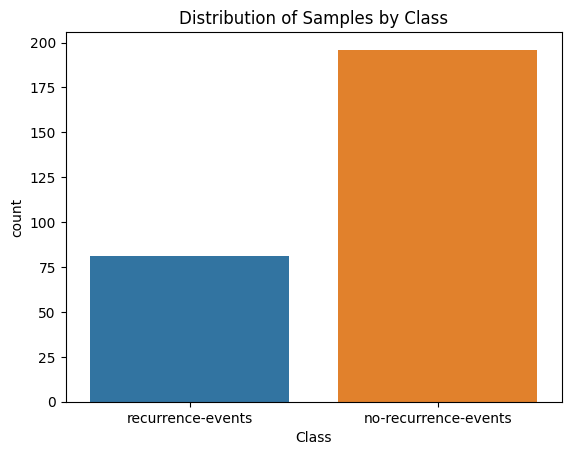

In [9]:
import seaborn as sns

sns.countplot(x='Class', data=breast_cancer)
plt.title('Distribution of Samples by Class')
plt.show()

<b><font color='red'> • Observation: The dataset is unbalanced in terms of samples distribution by class.<font/><b/>

<div class="alert alert-block alert-success"> 
    <b>2. Mixed Naive Bayes Algorithm</b>
</div>

In [10]:
from MixedNaiveBayes import fit_mixed_naive_bayes, predict

categorical_probabilities, numerical_probabilities, class_probabilities = fit_mixed_naive_bayes(breast_cancer, laplace_smoothing=False)

# Testing the second row
row = [['50-59', 'ge40', '15-19', '0-2', 'no', 1, 'right', 'central', 'no']]
prediction = predict(row, categorical_probabilities, numerical_probabilities, class_probabilities)
print('Prediction: ', prediction)

Prediction:  ['no-recurrence-events']


<div class="alert alert-block alert-success"> 
    <b>3. Verifying some machine learning hypotheses</b>
</div>

### Gaussian Distribution

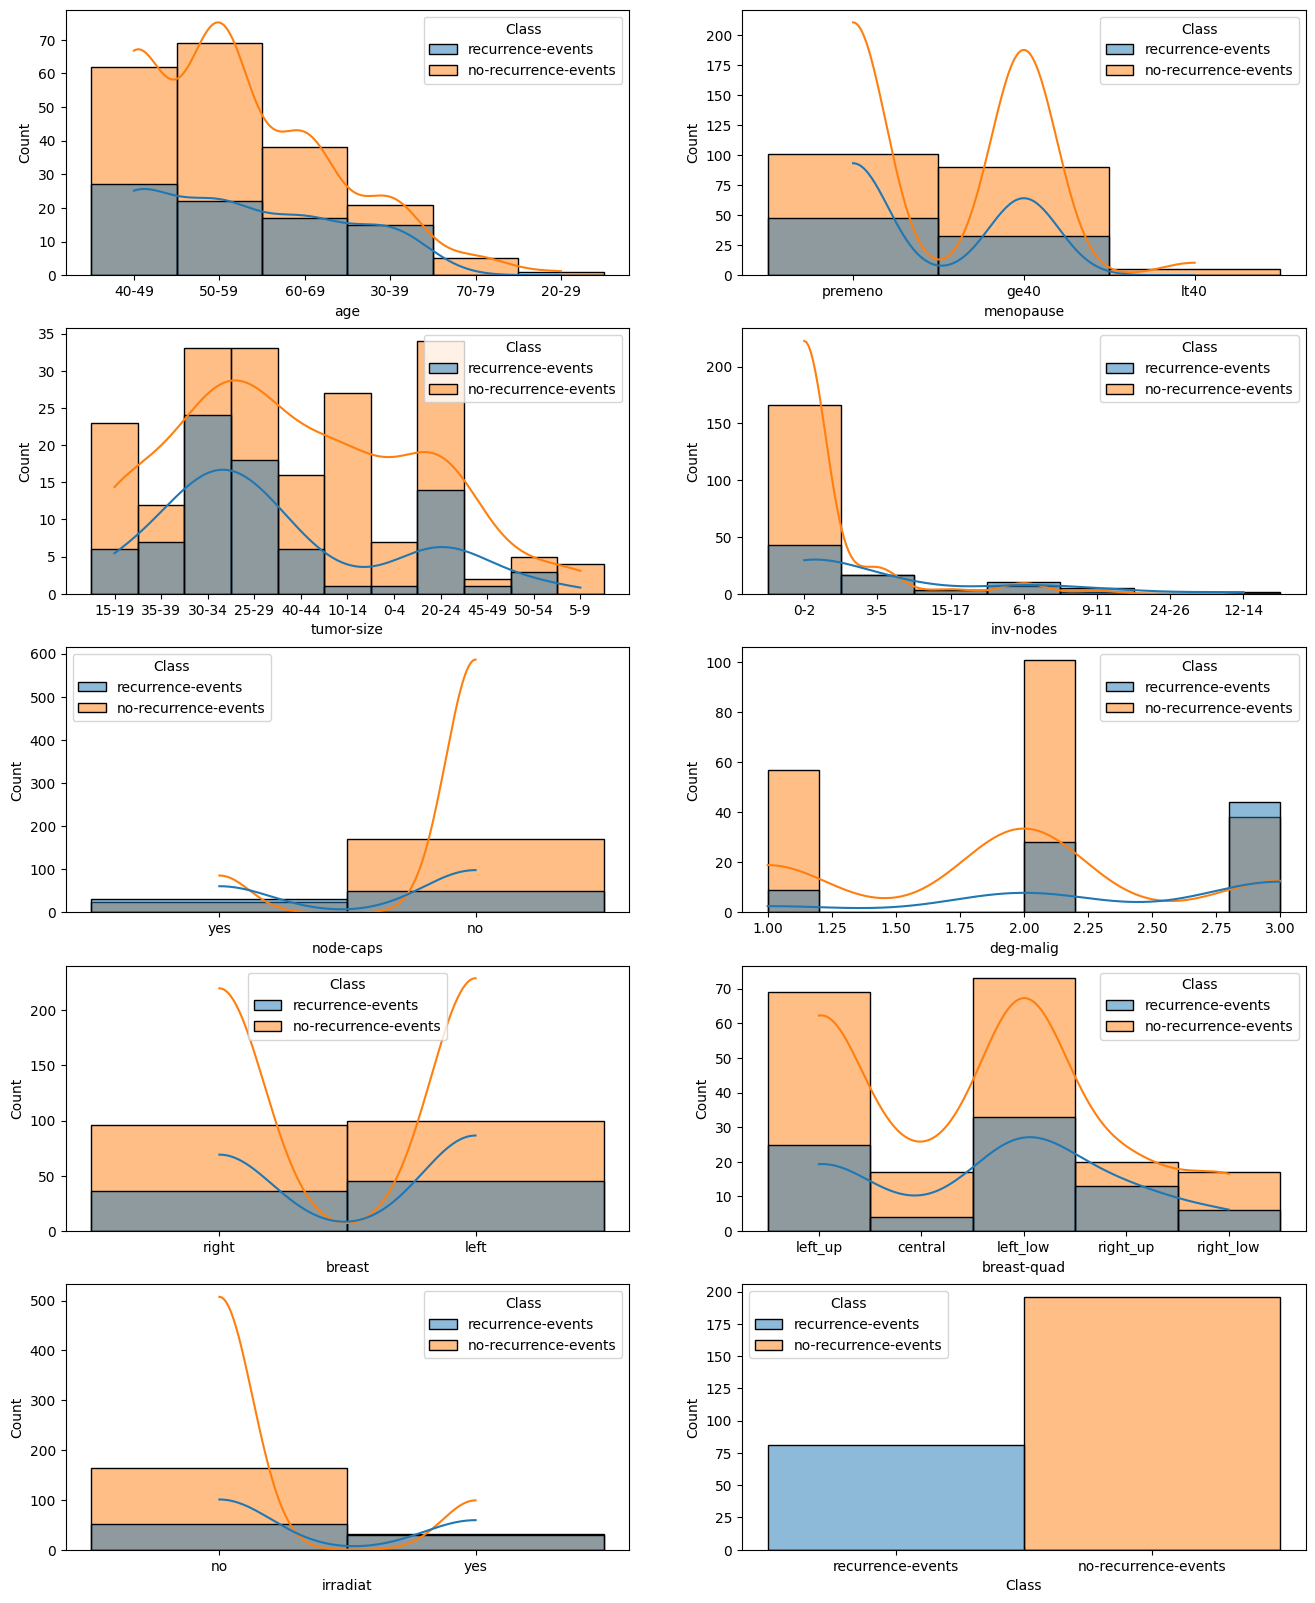

In [11]:
columns = breast_cancer.columns.values

plt.figure(figsize=(16, 20))

for col in columns:
    plt.subplot(5, 2, columns.tolist().index(col) + 1)
    sns.histplot(data=breast_cancer ,x=breast_cancer[col], kde=True, hue='Class')
    
plt.show()

<b><font color='red'> • We can observe that the dataset isn't gaussian distributed </font><b/>

### Independency

##### Encoding and scaling the dataset

In [12]:
from sklearn.preprocessing import LabelEncoder

breast_cancer2 = breast_cancer.apply(LabelEncoder().fit_transform)
cols = breast_cancer2.columns.values.tolist()

In [13]:
breast_cancer_X = breast_cancer2.drop(columns=['Class'], axis=1)
breast_cancer_Y = breast_cancer2['Class'].values
cols = breast_cancer_X.columns

scaler = StandardScaler()
breast_cancer_X = scaler.fit_transform(breast_cancer_X)

In [14]:
scaled_df = pd.DataFrame(breast_cancer_X, columns=cols)
scaled_df['Class'] = breast_cancer_Y

In [16]:
scaled_df.isna().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
Class          0
dtype: int64

In [17]:
corr = scaled_df.corr()

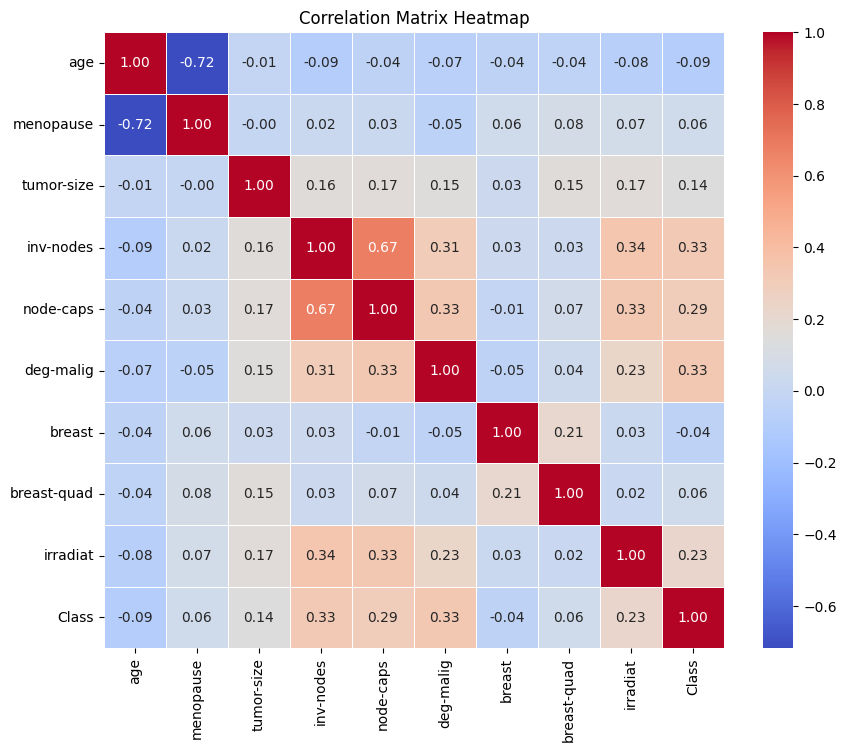

In [18]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<b><font color='red'> • "age" and "menopause" features that are a highly correlated <font/> <font color='black'>(0.72)<font/><b/> <br/>
<b><font color='red'> • "inv-nodes" and "node-caps" features that are a bit correlated <font/> <font color='black'>(0.67)<font/><b/>

In [19]:
breast_cancer = breast_cancer.drop(columns=['age', 'inv-nodes'])
scaled_df = scaled_df.drop(columns=['age', 'inv-nodes'])

### Linear Separability

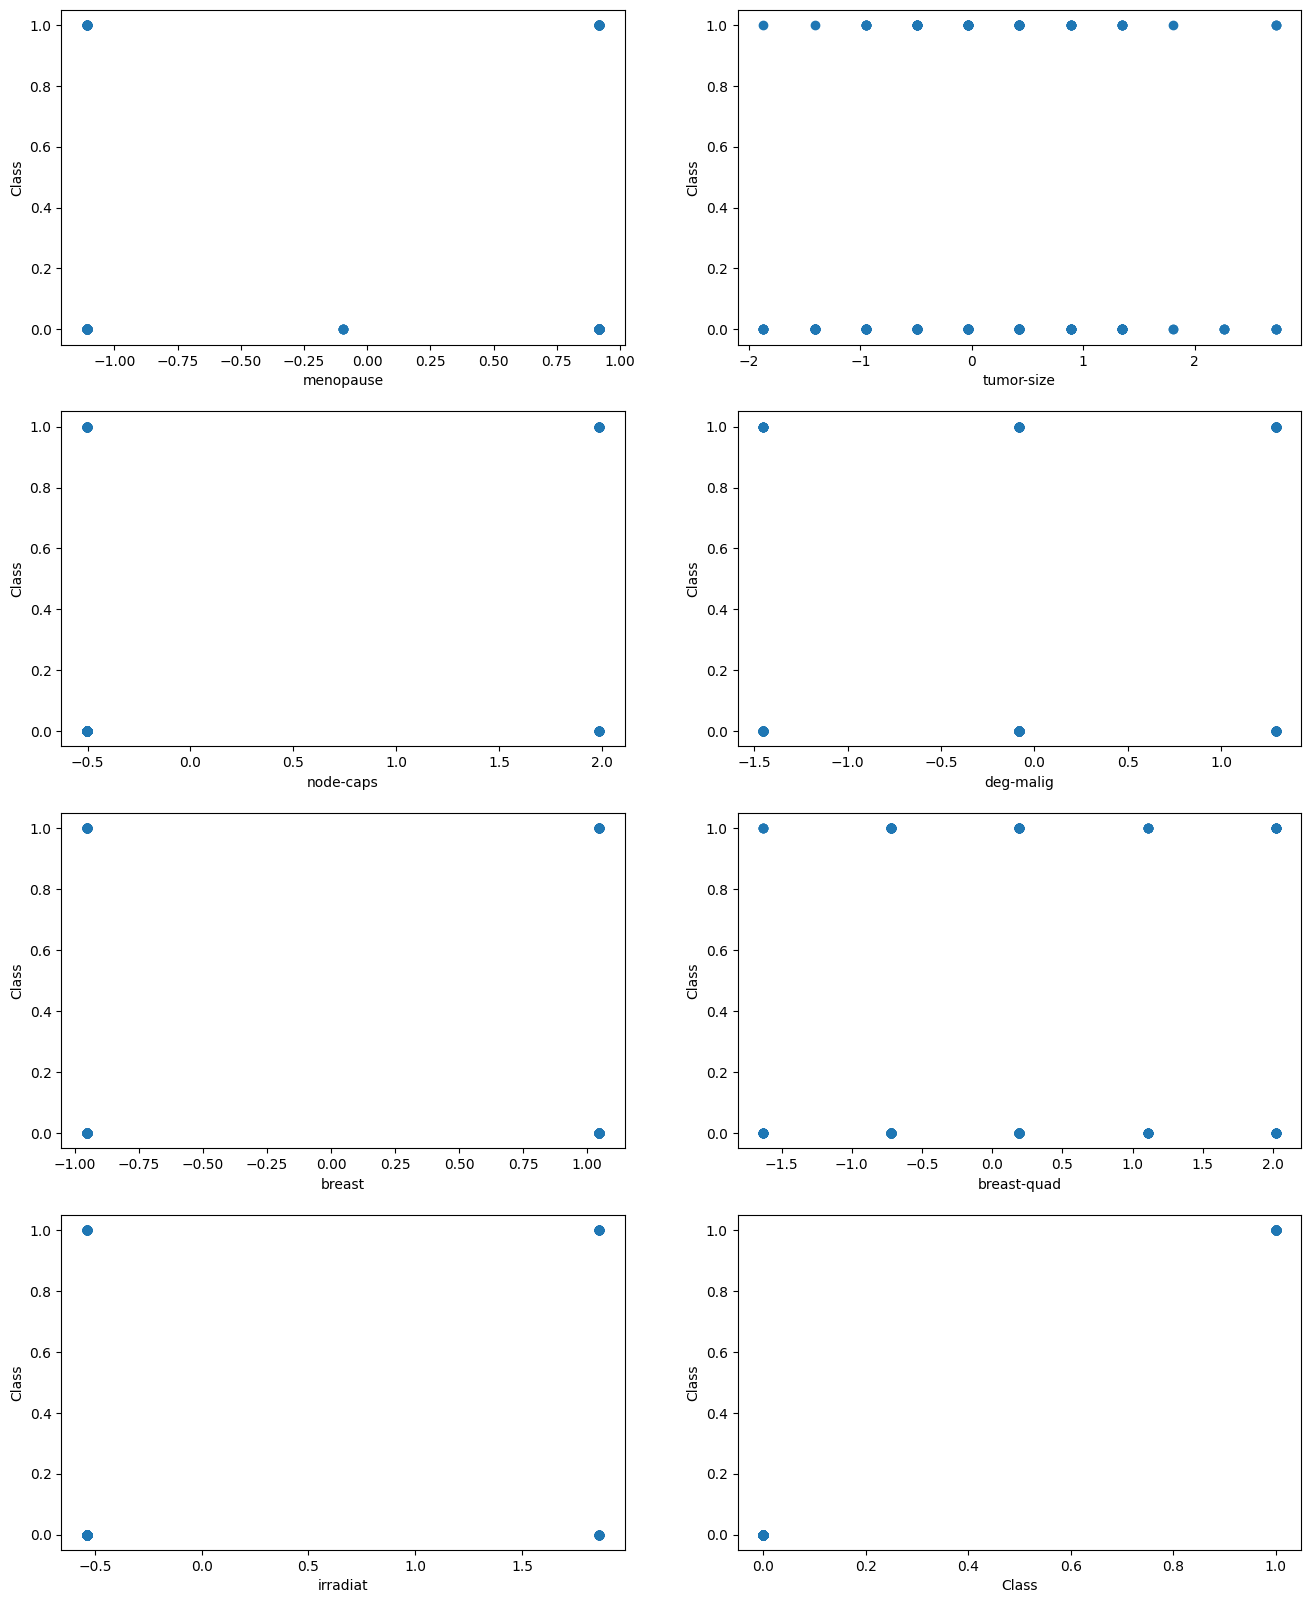

In [20]:
columns = scaled_df.columns.values

plt.figure(figsize=(16, 20))

for col in columns:
    plt.subplot(4, 2, columns.tolist().index(col) + 1)
    plt.scatter(scaled_df[col], scaled_df['Class'])
    plt.xlabel(col)
    plt.ylabel('Class')
plt.show()

<b><font color='red'> • According to the plots we notice that Logistic Regression can be used for this kind of problems <font/><b/>

<div class="alert alert-block alert-success"> 
    <b>4. Training the mentioned classifiers on the dataset</b>
</div>

##### Splitting the dataset into training and testing data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
NB_Y = breast_cancer['Class']
NB_X = breast_cancer.drop(columns=['Class'])
NB_Y = NB_Y.replace({'no-recurrence-events': 0, 'recurrence-events': 1})

In [23]:
NB_X_train, NB_X_test, NB_Y_train, NB_Y_test = train_test_split(NB_X, NB_Y, test_size=1/5, random_state=42)

In [24]:
y = scaled_df['Class']
X = scaled_df.drop(columns=['Class'])

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=1/5, random_state=42)

## Mixed Naive Bayes

##### Adel's version of Mixed Naive Bayes

In [26]:
NB_train = pd.concat([NB_X_train, NB_Y_train], axis=1)

In [27]:
categorical_probas, numerical_probas, class_probas = fit_mixed_naive_bayes(NB_train, laplace_smoothing=False)

In [28]:
y_pred = predict(NB_X_test, categorical_probas, numerical_probas, class_probas)

In [29]:
accuracy = accuracy_score(NB_Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7142857142857143


##### Yacine's version of Mixed Naive Bayes (OOP)

In [30]:
from NaiveBayes import NaiveBayes

MNB_model = NaiveBayes(numeric_features=['deg-malig'])
fitted = MNB_model.fit(NB_X_train, NB_Y_train)

In [31]:
y_pred = MNB_model.predict(NB_X_test)

In [32]:
accuracy = accuracy_score(NB_Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7142857142857143


##### 5-cross-validation evaluation

In [33]:
def k_cross_validation(model, X, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f'accuracy across 5 folds: {cv_results}')
    return kf

kf = k_cross_validation(MNB_model, NB_X, NB_Y, 5)

accuracy across 5 folds: [0.28571429 0.28571429 0.63636364 0.32727273 0.23636364]


##### Confusion matrix for each split

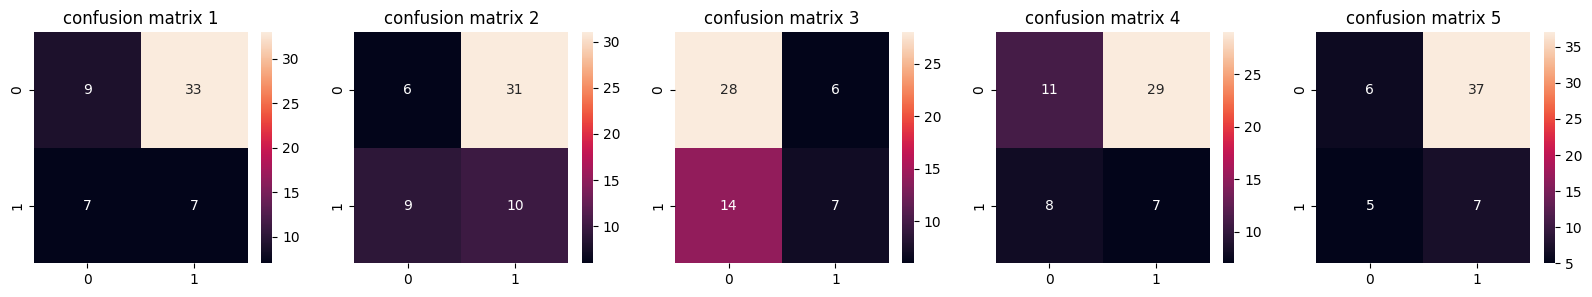

In [34]:
def cm_for_each_split(model, X, y, kf):
    confusion_matrices = []
    for train_index, test_index in kf.split(X, y):
        X_training, X_testing = X.iloc[train_index], X.iloc[test_index]
        y_training, y_testing = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_training, y_training)
        y_predicted = model.predict(X_testing)
        cm = confusion_matrix(y_testing, y_predicted)
        confusion_matrices.append(cm)
    
    plt.figure(figsize=(20, 3))
    
    for i, cm in enumerate(confusion_matrices):
        plt.subplot(1, 5, i + 1)
        plt.title(f'confusion matrix {i+1}')
        sns.heatmap(cm, annot=True)
    plt.show()

cm_for_each_split(MNB_model, NB_X, NB_Y, kf)

##### Recall, precision, f1-score

In [35]:
def metrics_mean(model, X, y, kf):
    precision = 0
    recall = 0
    f1 = 0
    for train_index, test_index in kf.split(X, y):
        X_training, X_testing = X.iloc[train_index], X.iloc[test_index]
        y_training, y_testing = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_training, y_training)
        y_predicted = model.predict(X_testing)
        
        precision += precision_score(y_testing, y_predicted)
        recall += recall_score(y_testing, y_predicted)
        f1 += f1_score(y_testing, y_predicted)
    
    
    mean_precision = precision / kf.get_n_splits()
    mean_recall = recall / kf.get_n_splits()
    mean_f1 = f1 / kf.get_n_splits()
    
    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1-Score: {mean_f1:.4f}")
    
metrics_mean(MNB_model, NB_X, NB_Y, kf)

Mean Precision: 0.2622
Mean Recall: 0.4819
Mean F1-Score: 0.3058


##### ROC curves function

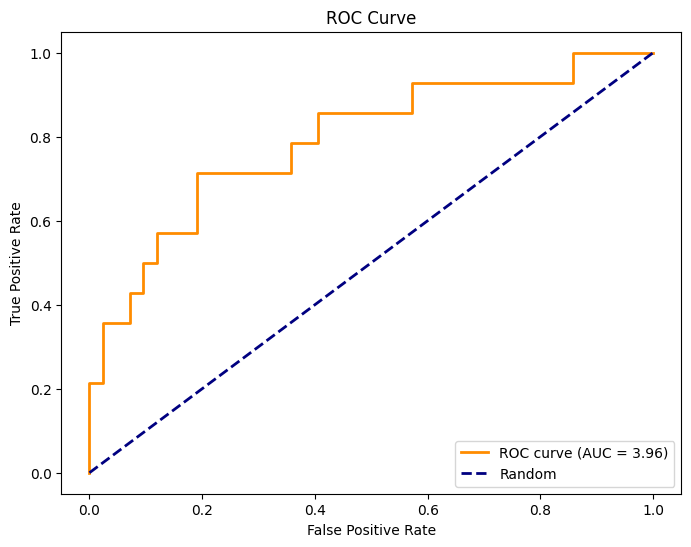

In [36]:
def display_roc_curve(model, X_test, Y_test):
    roc_auc = 0
    mean_fpr = 0
    mean_tpr = 0
    for train_index, test_index in kf.split(X, y):
        X_training, X_testing = X.iloc[train_index], X.iloc[test_index]
        y_training, y_testing = y.iloc[train_index], y.iloc[test_index]
        
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.decision_function(X_test)
        
        fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
        mean_fpr += fpr
        mean_tpr += tpr
        roc_auc += auc(fpr, tpr)
        
    mean_fpr = mean_fpr / kf.get_n_splits()
    mean_tpr = mean_tpr / kf.get_n_splits()
    
    plt.figure(figsize=(8, 6))
    plt.plot(mean_fpr, mean_tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

display_roc_curve(MNB_model, NB_X_test, NB_Y_test)

## SVM

In [37]:
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [38]:
y_pred = svm_model.predict(X_test)

In [39]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6785714285714286


##### 5-cross-validation evaluation

In [40]:
kf = k_cross_validation(svm_model, X, y, 5)

accuracy across 5 folds: [0.67857143 0.67857143 0.67272727 0.74545455 0.69090909]


##### Confusion matrix for each split

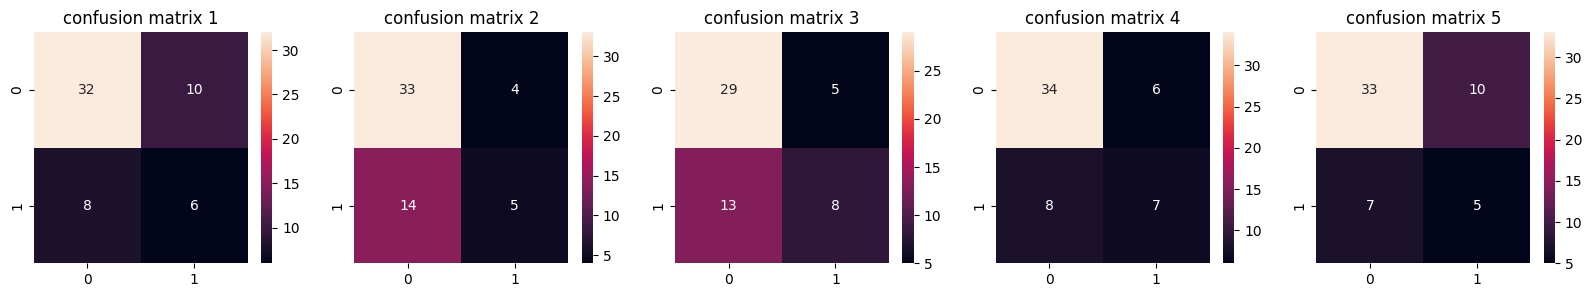

In [41]:
cm_for_each_split(svm_model, X, y, kf)

##### Recall, precision, f1-score

In [42]:
metrics_mean(svm_model, X, y, kf)

Mean Precision: 0.4835
Mean Recall: 0.3912
Mean F1-Score: 0.4196


##### ROC curves

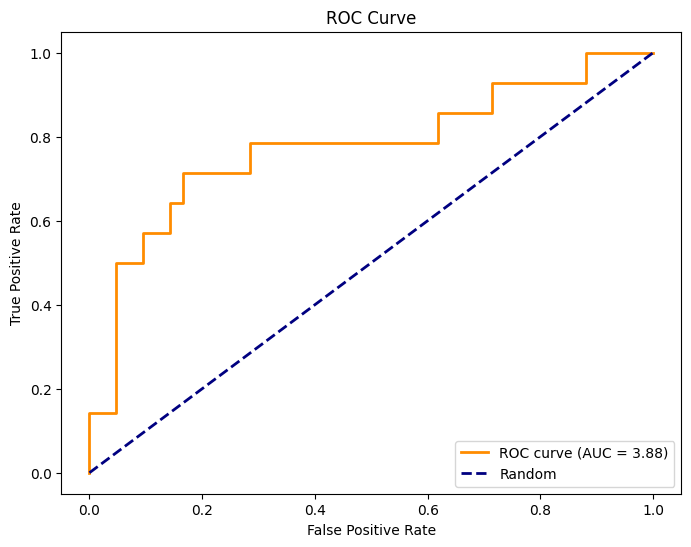

In [43]:
display_roc_curve(svm_model, X_test, Y_test)

## KNN

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_pred = knn_model.predict(X_test)

In [46]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7857142857142857


##### 5-cross-validation evaluation

In [47]:
kf = k_cross_validation(knn_model, X, y, 5)

accuracy across 5 folds: [0.76785714 0.66071429 0.61818182 0.63636364 0.8       ]


##### Confusion matrix for each split

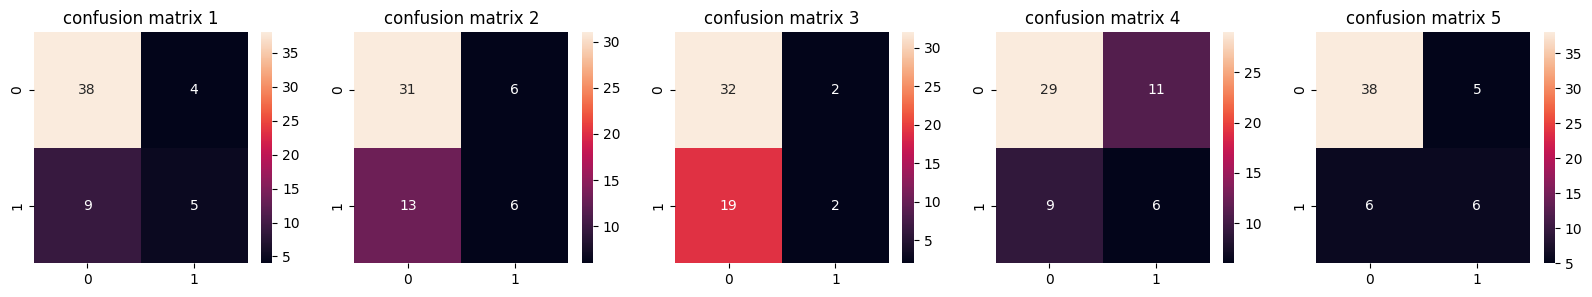

In [48]:
cm_for_each_split(knn_model, X, y, kf)

##### Recall, precision, f1-score

In [49]:
metrics_mean(knn_model, X, y, kf)

Mean Precision: 0.4908
Mean Recall: 0.3336
Mean F1-Score: 0.3757


##### ROC curves

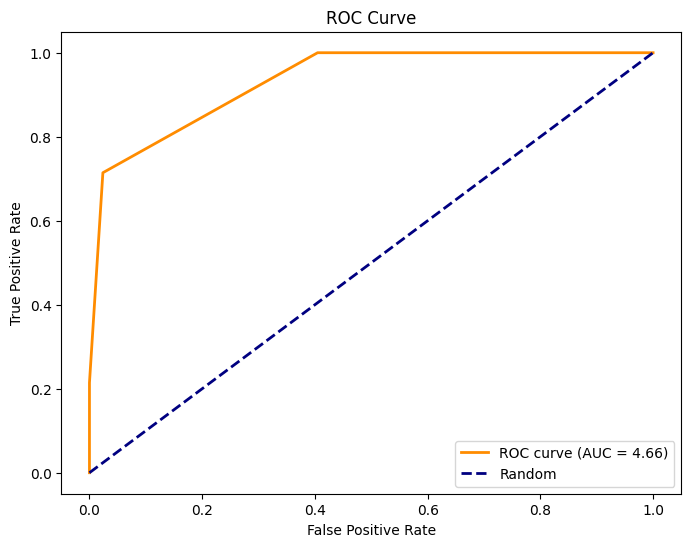

In [50]:
display_roc_curve(knn_model, X_test, Y_test)

## Logistic regression

In [51]:
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [52]:
y_pred = LR_model.predict(X_test)

In [53]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.75


##### Convergence graph

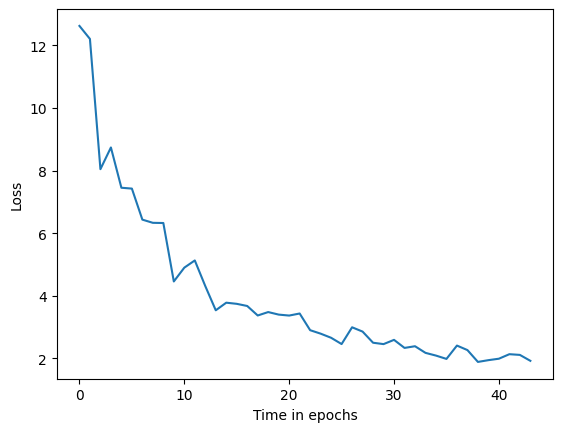

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from io import StringIO
import sys

old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
clf = SGDClassifier(verbose=1)
clf.fit(X_train, Y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.figure()
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs"); plt.ylabel("Loss")
plt.show()

##### 5-cross-validation evaluation

In [55]:
kf = k_cross_validation(LR_model, X, y, 5)

accuracy across 5 folds: [0.75       0.71428571 0.65454545 0.74545455 0.78181818]


##### Confusion matrix for each split

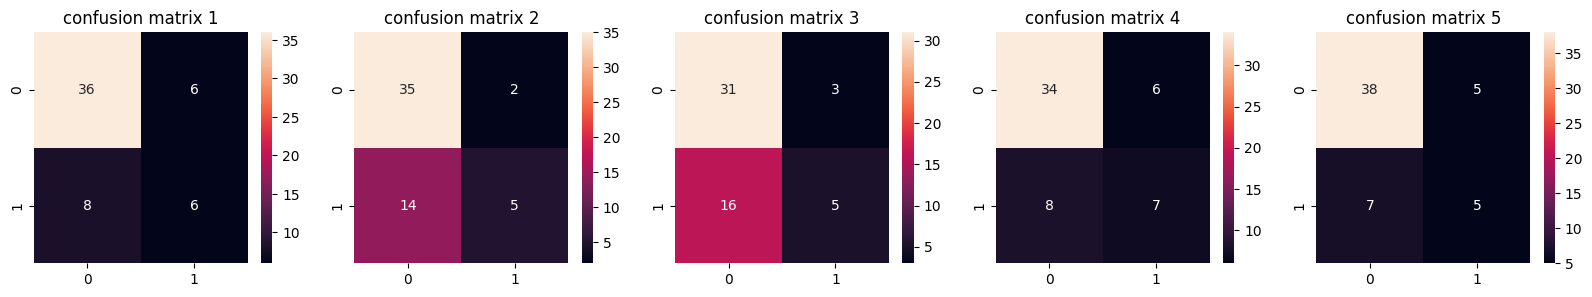

In [56]:
cm_for_each_split(LR_model, X, y, kf)

##### Recall, precision, f1-score

In [57]:
metrics_mean(LR_model, X, y, kf)

Mean Precision: 0.5755
Mean Recall: 0.3626
Mean F1-Score: 0.4291


##### ROC curves

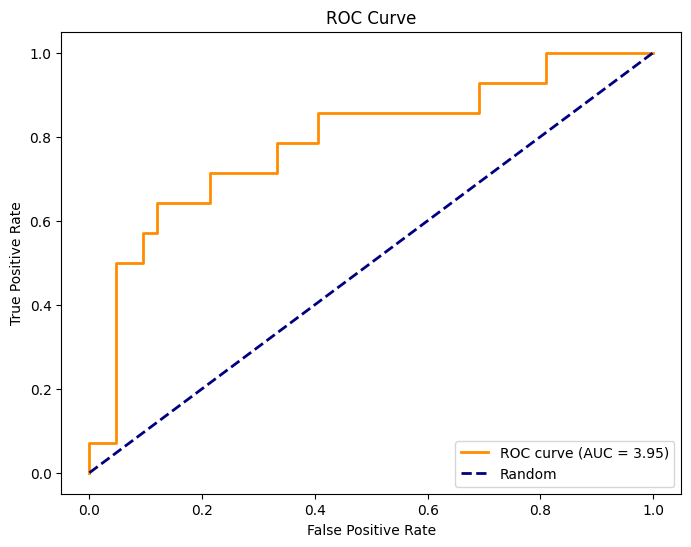

In [58]:
display_roc_curve(LR_model, X_test, Y_test)

## Decision Tree

In [59]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [60]:
y_pred = DT_model.predict(X_test)

In [61]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7678571428571429


##### 5-cross-validation evaluation

In [62]:
kf = k_cross_validation(DT_model, X, y, 5)

accuracy across 5 folds: [0.76785714 0.64285714 0.63636364 0.63636364 0.69090909]


##### Confusion matrix for each split

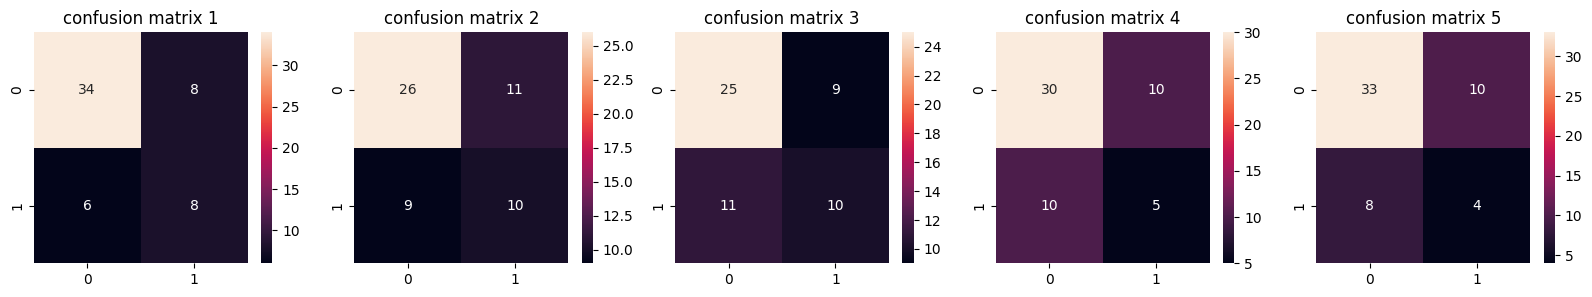

In [63]:
cm_for_each_split(DT_model, X, y, kf)

##### Recall, precision, f1-score

In [64]:
metrics_mean(DT_model, X, y, kf)

Mean Precision: 0.4648
Mean Recall: 0.4648
Mean F1-Score: 0.4643


##### ROC curves

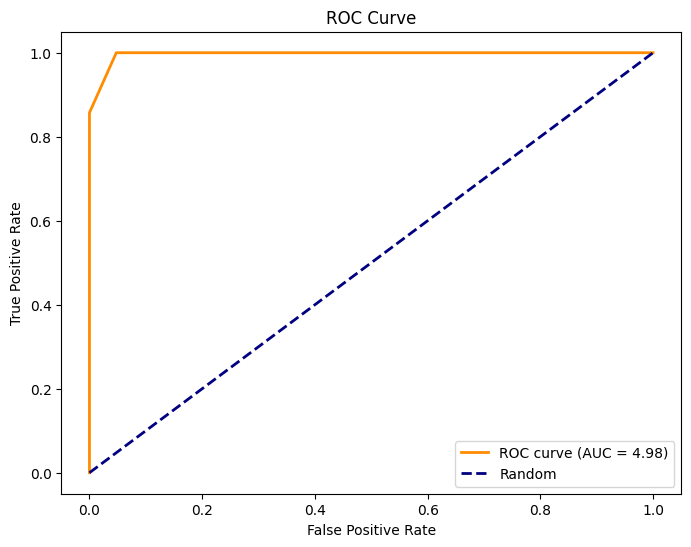

In [65]:
display_roc_curve(DT_model, X_test, Y_test)

<div class="alert alert-block alert-success"> 
    <b>6. Displaying, Exporting and Importing Models with the pre-processings</b>
</div>

##### Displaying models infromations

In [66]:
print(f'SVM Model Information: {MNB_model}')
print(f'SVM Model Information: {svm_model}')
print(f'KNN Model Information: {knn_model}')
print(f'Logistic Regression Model Information: {LR_model}')
print(f'Decision Tree Model Information: {DT_model}')

SVM Model Information: NaiveBayes(numeric_features=['deg-malig'])
SVM Model Information: SVC(kernel='linear')
KNN Model Information: KNeighborsClassifier(n_neighbors=3)
Logistic Regression Model Information: LogisticRegression(max_iter=1000)
Decision Tree Model Information: DecisionTreeClassifier()


##### Exporting Models & the pre-processings

In [67]:
import joblib

joblib.dump(MNB_model, 'Models/MNB_model.pkl')
joblib.dump(svm_model, 'Models/svm_model.pkl')
joblib.dump(knn_model, 'Models/knn_model.pkl')
joblib.dump(LR_model, 'Models/LR_model.pkl')
joblib.dump(DT_model, 'Models/DT_model.pkl')

['Models/DT_model.pkl']

In [68]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

joblib.dump(scaler, 'Pre-processings/scaler.pkl')
joblib.dump(label_encoder, 'Pre-processings/label_encoder.pkl')

['Pre-processings/label_encoder.pkl']

##### Importing Models & the pre-processings

In [69]:
MNB_model = joblib.load('Models/MNB_model.pkl')
svm_model = joblib.load('Models/svm_model.pkl')
knn_model = joblib.load('Models/knn_model.pkl')
LR_model = joblib.load('Models/LR_model.pkl')
DT_model = joblib.load('Models/DT_model.pkl')

In [70]:
scaler = joblib.load('Pre-processings/scaler.pkl')
label_encoder = joblib.load('Pre-processings/label_encoder.pkl')

<div class="alert alert-block alert-success"> 
    <b>8. The recommended evaluation metric is: ROC curve</b>
</div>

<div class="alert alert-block alert-success"> 
    <b>9. The best model according to the chosen metric</b>
</div>

##### The best model according the chosen metric is: Decision Tree

## Predicting the third sample using decision tree model

In [71]:
sample = breast_cancer[2:3]
sample = sample.drop("Class", axis=1)
sample

,menopause,tumor-size,node-caps,deg-malig,breast,breast-quad,irradiat
2,ge40,35-39,no,2,left,left_low,no
